<img src='fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Statistical Inference and Hypothesis Testing
<a class="tocSkip">
</h1>
  
</h1>  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp

import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Table of contents
1. [Introduction](#intro)
    1. [Data Load](#intro-dataload)
2. [Confindence Intervals](#ci)
    1. [BMI](#ci-bmi)
    2. [Charges](#ci-charges)
3. [Variable ](#paragraph2)

## Introduction  <a name="intro"></a>

In this section we will conduct statistical inference and hypoyhesis testing of the medical charges dataset. In particular, we will look carefully into the variables BMI and Smoking, and their relationship to other variables like Age and Charges. We have chosen these variables since we believe they could account for extra increases in insurance price.

### Data Load  <a name="intro-dataload"></a>

In [4]:
# Load the data
insurance = pd.read_csv("data/insurance.csv")

# Check the column names
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Confidence Interval Funcion Definition

We have defined a function that will simplify the calculation of the confidence intervals and increase code readibility and clarity.

In [5]:
# Funcion para calcular intervalos
def confidence_interval(data):  
    n = len(data)
    barX = data.mean()
    s = data.std()

    # Cálculo rápido del punto crítico:
    cl = 0.95
    alpha = 1 - cl
    crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
    # Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
    conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
    print("The confidence interval is ", conf_int)
    print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

## BMI

In this section we will look into the BMI variable. The body mass index is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2.
The BMI ranges are defined as follows:

- Less than 18.5 = Underweight
- Between 18.5 - 24.9 = Healthy Weight
- Between 25 - 29.9 = Overweight
- Over 30 = Obese

The following graph illustrates the different combinations of height and weight that a person can have in order to belong to each of these groups. It is important to note that the BMI does not account for gender, age, ethnicity or muscle mass.

<img src="fig/bmi.jpg" width=500 height=500 style="margin: auto" />


### Confidence Interval for the BMI average

In the next line we will calculate the 95% confidence interval for the average of the BMI for the population.

In [6]:
confidence_interval(insurance.bmi)

The confidence interval is  [30.33664297 30.99015075]
Rounded to 4 digits: [30.34, 30.99]


According to the BMI ranges, the insurance withholder is obese. This is slighly higher than the average BMI for the USA, which is 28.5 [1]

### BMI by Gender

#### Hypothesis Testing: Difference in BMI mean by gender
Next, we will test whether there exist significant differences in the BMI between males and females with a confidence level of 95%. we have chosen to test whether females have a higher BMI because women tend to have slighly more fat than men.

$$H_0:\{\mu_{female} \leq \mu_{male}\}$$
$$H_A:\{\mu_{female} > \mu_{male}\}$$

In [7]:
insurance_females = insurance[insurance.sex == 'female']
insurance_males = insurance[insurance.sex == 'male']
stats.ttest_ind(a=insurance_females.bmi, b=insurance_males.bmi, equal_var=False, alternative='greater')

Ttest_indResult(statistic=-1.697027933124022, pvalue=0.9550378466608257)

The p-value is higher than 0.05, therefore the null hypothesis cannot be rejected and he alternative hypothesis is not accepted: the BMI is not higher for females than for males. This could be due to social pressure to remain thin being higher for women than for men [2].

Next, we will calculate the confidence intervals for each of the datasets, to check that our result and the decision to reject $H_0$ is correct.

#### BMI Confidence Interval in Men

In [8]:
confidence_interval(insurance_males.bmi)

The confidence interval is  [30.4802429  31.40601449]
Rounded to 4 digits: [30.48, 31.41]


#### BMI Confidence Interval in Women

In [9]:
confidence_interval(insurance_females.bmi)

The confidence interval is  [29.9171864  30.83831209]
Rounded to 4 digits: [29.92, 30.84]


As expected, men have higher a higher BMI than women, although the difference is slight. 

### BMI by Age

In this section we will analyze differences in BMI according to age. For this, we will divide our dataset in 3 groups: young (0-25), middle aged (26-40) and old (41-65). Admittedly, people aged 41-65 are not old, we only chose this label to improve readibility as opposed to Older-Mid-Aged.

In [10]:
Age_nodes = [0,25,40,65] 
insurance['Age_bins'] = pd.cut(insurance['age'], bins=Age_nodes, ordered=True, labels=['Young', 'Mid-Aged', 'Old'])

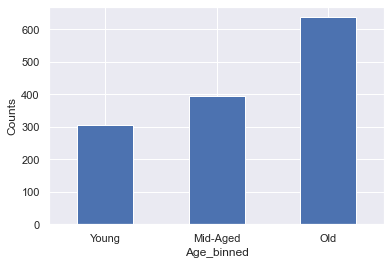

In [11]:
plot = insurance['Age_bins'].value_counts().sort_index().plot.bar(rot=0, xlabel='Age_binned', ylabel ='Counts')

#### Hypothesis Testing: Difference in BMI by Age
In this section we will prove that the mean of the BMI is different for the different age groups. 

$$
\quad\\
H_0 = \{\mu_{young} = \mu_{middle} = \mu_{old}\}
\quad\\
$$

Since there are more than groups, we will use ANOVA. In this test, a p-value lower than 0.05 means that _at least_ one mean is different from the rest.

In [12]:
anova = stats.f_oneway(insurance['bmi'][insurance['Age_bins'] == 'Young'],
               insurance['bmi'][insurance['Age_bins'] == 'Mid-Aged'],
               insurance['bmi'][insurance['Age_bins'] == 'Old'])
anova

F_onewayResult(statistic=6.894035218091769, pvalue=0.0010503023799197928)

**Conclusiones ANOVA**

The p-value is lower than 0.05, therefore we reject $H_0$ and confir that not all means for the different age groups are equal.

Next, we will calculate the confidence intervals to confirm this

#### BMI Confidence Interval in Young Patients

In [13]:
insurance_age_young = insurance[insurance.Age_bins == 'Young']
confidence_interval(insurance_age_young.bmi)

The confidence interval is  [29.29960019 30.71510569]
Rounded to 4 digits: [29.3, 30.72]


#### BMI Confidence Interval in Middle-Age Patients

In [14]:
insurance_age_middle = insurance[insurance.Age_bins == 'Mid-Aged']
confidence_interval(insurance_age_middle.bmi)

The confidence interval is  [29.52477121 30.73859588]
Rounded to 4 digits: [29.52, 30.74]


#### BMI Confidence Interval in Old Patients

In [15]:
insurance_age_old = insurance[insurance.Age_bins == 'Old']
confidence_interval(insurance_age_old.bmi)

The confidence interval is  [30.85028966 31.76622525]
Rounded to 4 digits: [30.85, 31.77]


After calculating the confidence interval, we see that the BMI mean for Young and Middle-Aged patients is practically identical. However, the confidence interval for the mean for Older patients is higher than for Younger patients since the intervals do not overlap.

### Conclusiones del intervalo de confianza para la variable BMI
While your BMI can give you an indication as to whether you’re at a healthy weight for your height, it’s far from perfect. BMI calculations and charts don’t adjust for your gender, age, race, ethnicity and other factors, which can impact your body fat and muscle—and therefore skew your BMI higher or lower. For example, research shows that the risk of diabetes is higher among Asians, Blacks and Hispanics than whites, even after taking into account BMI differences[[1](https://diabetesjournals.org/care/article/29/7/1585/28623/Ethnicity-Obesity-and-Risk-of-Type-2-Diabetes-in)].

BMI is a tool that helps determine whether you’re at a healthy weight in relation to your height—but “tool” is the operative word. While it’s designed to estimate whether you have excess or inadequate body fat, it does not measure fat directly—therefore it does not provide the whole picture for some people.

That’s why BMI alone should not be the only factor considered when gauging if you’re at a healthy weight. “It’s a base assessment,” says Jamie Feit, a registered dietitian at Testing.com, which offers at-home and lab testing information and resources. Other factors to consider include your age, gender, weight distribution, family medical history and lifestyle.

Adolphe Quetelet, a mathematician, first developed BMI and named it decades ago—it was first cited in 1972 in the Journal of Chronic Diseases. Quetelet developed the height-to-weight equation as a way to help determine an ideal weight for populations in general, not necessarily for individuals.

But because BMI is an accessible—albeit impercise—tool, it’s been adopted by the healthcare community and scientific researchers as a way of indicating the relative amount of body fat on a person’s body frame, and assessing if a person is at a healthy weight for their height.

While BMI doesn’t directly measure body fat, per se, it can give you and your healthcare provider an indication of whether you carry excess body fat, which in turn puts you at greater risk for type 2 diabetes, heart disease, high blood pressure and some cancers. However, having a BMI that’s too low poses other health problems, such as malnutrition and low bone density.

<img src='./fig/BMI_Graph.jpg'>


## Insurance Price

In this section we will analyze the differences in insurance price for patients according to gender, age and BMI. We will also back with research whether any increase in cost is research-backed or presumably arbitrary.

### Confidence interval for the Insurance Price average

In [16]:
confidence_interval(insurance.charges)

The confidence interval is  [12621.54197823 13919.30255205]
Rounded to 4 digits: [1.262e+04, 1.392e+04]


The population insurance price mean is between 12.621 k and 13.919 k

 ### Insurance Price by Gender

#### Hypothesis Testing: Difference in insurance price mean by gender
We will test whether insurance price is different in males than females. For this, we will evaluate whether it is higher for men than for women.

$$H_0:\{\mu_{female} > \mu_{male}\}$$
$$H_A:\{\mu_{female} \leq \mu_{male}\}$$

In [17]:
stats.ttest_ind(a=insurance_females.charges, b=insurance_males.charges, equal_var=False, alternative='less')

Ttest_indResult(statistic=-2.1008878232359565, pvalue=0.017920507478008323)

The p-value is lower than 0.05. We reject the null hypothesis for a confidence level of 95%: insurance costs are higher for men than for women.

Next, we will calculate the confidence intervals to confirm that the rejection of $H_0$ is correct.

#### Insurance Price Confidence Interval in Men

In [18]:
confidence_interval(insurance_males.charges)

The confidence interval is  [12978.95334557 14934.54900987]
Rounded to 4 digits: [1.298e+04, 1.493e+04]


#### Insurance Price Confidence Interval in Women

In [19]:
confidence_interval(insurance_females.charges)

The confidence interval is  [11721.83688351 13417.32080417]
Rounded to 4 digits: [1.172e+04, 1.342e+04]


As expected, 

### Insurance Price by Age

#### Hypothesis Testing: Difference in Insurance Price by Age
Next, we will analyze whether there is a difference in the mean of the insurance price related to the age of the patient.

$$
\quad\\
H_0 = \{\mu_{young} = \mu_{middle} = \mu_{old}\}
\quad\\
$$

Once again, we will use ANOVA to check this hypothesis.

In [20]:
anova = stats.f_oneway(insurance['charges'][insurance['Age_bins'] == 'Young'],
               insurance['charges'][insurance['Age_bins'] == 'Mid-Aged'],
               insurance['charges'][insurance['Age_bins'] == 'Old'])
anova

F_onewayResult(statistic=52.91836477005623, pvalue=7.645137051605051e-23)

The p-value is lower than 0.05, therefore we can reject the null hypothesis and state that there is a difference in the mean of the groups. However, this test does not say which mean is different. We will now perform some confidence intervals to get an idea of what is happening.

#### Insurance Price Confidence Interval in Young Patients

In [22]:
confidence_interval(insurance_age_young.charges)

The confidence interval is  [ 7769.74453221 10404.28708164]
Rounded to 4 digits: [7.77e+03, 1.04e+04]


#### Insurance Price Confidence Interval in Middle-Aged Patients

In [22]:
confidence_interval(insurance_age_middle.charges)

The confidence interval for males is  [ 9973.90890945 12219.45107941]
Rounded to 4 digits: [9.974e+03, 1.222e+04]


#### Insurance Price Confidence Interval in Old Patients

In [23]:
confidence_interval(insurance_age_old.charges)

The confidence interval is  [15712.20183784 17543.7151356 ]
Rounded to 4 digits: [1.571e+04, 1.754e+04]


After calculating the confidence interval for each age group, we conclude that the older the patient, the higher the medical insurance cost. This seems justified since older patients are more likely to need more care than younger patients, creating a 

### Cálculo de charges por BMI

In [24]:
# En primer lugar, dividimos el dataset 
BMI_nodes = [0,18.5,25,30,100]
insurance['BMI_bins'] = pd.cut(insurance['bmi'], bins=BMI_nodes, ordered=True, labels=['Underweight','Normal', 'Overweight', 'Obesity'])

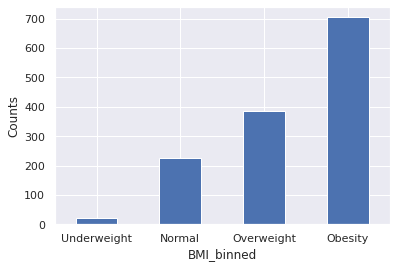

In [25]:
plot = insurance['BMI_bins'].value_counts().sort_index().plot.bar(rot=0, xlabel='BMI_binned', ylabel ='Counts')

#### Checking Hypothesis: Comprobar que los cargos van aumentando en función del BMI

$$
\quad\\
H_0 = \{\mu_{Underweight} = \mu_{normal} = \mu_{overweight}\ = \mu_{obesity}\}
\quad\\
$$

Usamos ANOVA porque queremos comparar más de dos variables.

In [43]:
anova = stats.f_oneway(insurance['charges'][insurance['BMI_bins'] == 'Underweight'],
               insurance['charges'][insurance['BMI_bins'] == 'Normal'],
               insurance['charges'][insurance['BMI_bins'] == 'Overweight'],
               insurance['charges'][insurance['BMI_bins'] == 'Obesity'])
anova

F_onewayResult(statistic=18.80499193254325, pvalue=5.997613229094973e-12)

**Conclusiones ANOVA**

Podemos ver en los resultados de ANOVA que el pvalue es mucho menor que 0.5, por lo tanto podemos descartar la $H_0$ de que todas las medias son iguales para todos los intervalos de BMI.

Vamos a calcular los intervalos de confianza de cada grupo para demostrarlo.

#### Cálculo de charges para BMI = Underweight

In [26]:
insurance_bmi_under = insurance[insurance.BMI_bins == 'Underweight']
confidence_interval(insurance_bmi_under.charges)

The confidence interval for males is  [ 5410.64371885 11904.59758592]
Rounded to 4 digits: [5.411e+03, 1.19e+04]


#### Cálculo de charges para BMI = Normal

In [27]:
insurance_bmi_normal = insurance[insurance.BMI_bins == 'Normal']
confidence_interval(insurance_bmi_normal.charges)

The confidence interval for males is  [ 9459.65852482 11411.22291341]
Rounded to 4 digits: [9.46e+03, 1.141e+04]


#### Cálculo de charges para BMI = Overweight

In [28]:
insurance_bmi_over = insurance[insurance.BMI_bins == 'Overweight']
confidence_interval(insurance_bmi_over.charges)

The confidence interval for males is  [10193.01831487 11802.58944704]
Rounded to 4 digits: [1.019e+04, 1.18e+04]


#### Cálculo de charges para BMI = Obese

In [29]:
insurance_bmi_obesity = insurance[insurance.BMI_bins == 'Obesity']
confidence_interval(insurance_bmi_obesity.charges)

The confidence interval for males is  [14485.93218569 16635.92045683]
Rounded to 4 digits: [1.449e+04, 1.664e+04]


### Cálculo de charges por Smoke
Vamos a comenzar proponiendo la siguiente hipótesis alternativa, teniendo en cuenta la hipótesis nula:

$$H_0:\{\mu_{nonSmoker} > \mu_{smoker}\}$$
$$H_A:\{\mu_{nonSmoker} \leq \mu_{smoker}\}$$

In [49]:
insurance_smoker = insurance[insurance.smoker == 'yes']
insurance_nonSmoker = insurance[insurance.smoker == 'no']
stats.ttest_ind(a=insurance_nonSmoker.charges, b=insurance_smoker.charges, equal_var=False, alternative='less')

Ttest_indResult(statistic=-32.751887766341824, pvalue=2.94473222335849e-103)

Como el pvalue es menor que 0.05, al estar calculandolo con un intervalo de confianza del 95%, para rechazar la hipótesis nula, dicho valor deberá ser menor. Como esto se cumple, podemos rechazar la hipótesis nula.

A continuación, vamos a calcular los intervalos de confianza para cada uno de los datasets, para comprobar que nuestro resultado y la decisión de rechazar $H_0$ tiene sentido.

In [50]:
confidence_interval(insurance_smoker.charges)

The confidence interval for males is  [30683.64622989 33416.81743318]
Rounded to 4 digits: [3.068e+04, 3.342e+04]


In [51]:
confidence_interval(insurance_nonSmoker.charges)

The confidence interval for males is  [8074.12262003 8794.41397569]
Rounded to 4 digits: [8.074e+03, 8.794e+03]


**Conclusiones de la variable Smoker**
Podemos ver que a los fumadores les cobran entre 30K y 33K mientras que a los no fumadores les cobran entre 8K y 8.7K.

# Bibliography

[1] "Global status report on noncommunicable diseases 2014". World Health Organization

[2] Rodin, J., Silberstein, L., & Striegel-Moore, R. (1984). Women and weight: A normative discontent. Nebraska Symposium on Motivation, 32, 267–307.

[3] Stevens, J., Cai, J., Pamuk, E.R., Williamson, D.F., Thun, M.J. and Wood, J.L. (1998). The Effect of Age on the Association between Body-Mass Index and Mortality. New England Journal of Medicine, [online] 338(1), pp.1–7. doi:10.1056/nejm199801013380101.